## [WARMUP] Test image imports

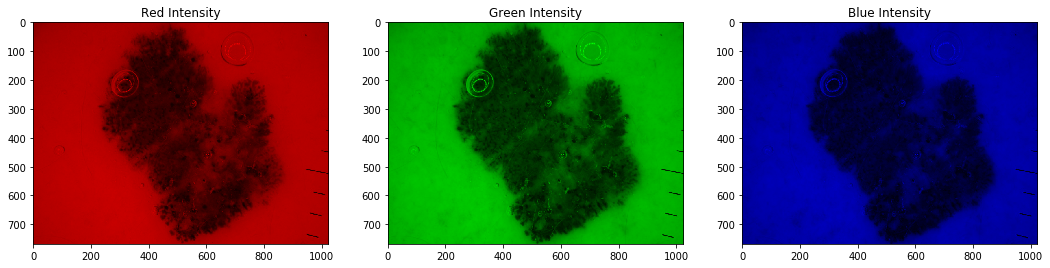

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from skimage import data, io, filters
import os

def show_images(images,titles=None):
    """Display a list of images"""
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

# filepath = os.path.abspath("./data/benign/ISIC_0000232.jpg")
filepath = os.path.abspath("./data/malignant/ISIC_0010416.jpg")
# filepath = os.path.abspath("./data/malignant/ISIC_0033192.jpg")
# filepath = os.path.abspath("./data/benign/ISIC_0034267.jpg")


# filepath = os.path.abspath("./data/benign/ISIC_0000232.jpg")
image = data.load(filepath)

red, green, blue = image.copy(), image.copy(), image.copy()

red[:,:,(1,2)] = 0
green[:,:,(0,2)] = 0
blue[:,:,(0,1)] = 0

show_images(images=[red, green, blue], titles=['Red Intensity', 'Green Intensity', 'Blue Intensity'])

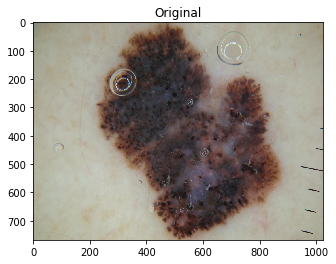

In [141]:
show_images(images=[image], titles=['Original'])

## Cropping the image

In [66]:
import numpy as np
from skimage.io import imread
from skimage.util import crop
import matplotlib.pylab as plt

# filepath = os.path.abspath("./data/malignant/ISIC_0033946.jpg")
filepath = os.path.abspath("./data/benign/ISIC_0000201.jpg")

A = data.load(filepath)
# A = imread('lena.jpg')

# crop_width{sequence, int}: Number of values to remove from the edges of each axis. 
# ((before_1, after_1), … (before_N, after_N)) specifies unique crop widths at the 
# start and end of each axis. ((before, after),) specifies a fixed start and end 
# crop for every axis. (n,) or n for integer n is a shortcut for before = after = n 
# for all axes.
B = crop(A, ((0, 0), (100, 100), (0,0)), copy=False)

print(A.shape, B.shape)
# (220, 220, 3) (70, 120, 3)

plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(A), plt.axis('off') 
plt.subplot(122), plt.imshow(B), plt.axis('off') 
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\neera\\OneDrive\\Documents\\STAT542\\STAT542_Project2\\data\\benign\\ISIC_0000201.jpg'

## [WARMUP] Change colormap

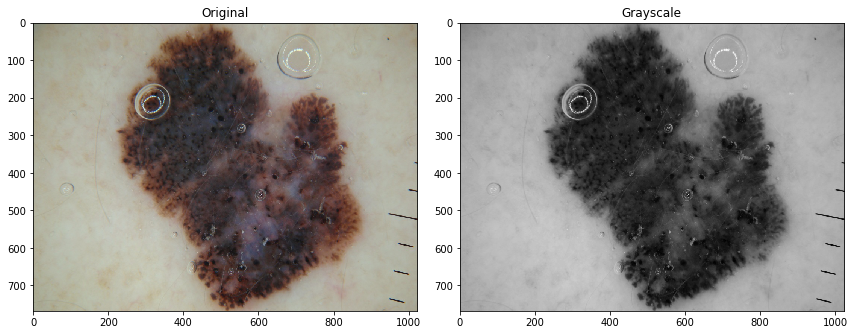

In [142]:
from skimage import data
from skimage.color import rgb2gray

original = image
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

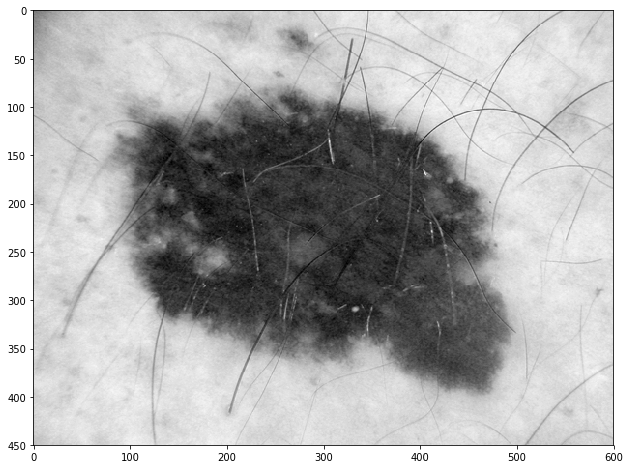

In [19]:
from skimage import data
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap

cmap_dab = LinearSegmentedColormap.from_list('mycmap', ['white',
                                             'black'])

ihc_hed = rgb2hed(image)

fig, axes = plt.subplots(1, 1, figsize=(12, 8))
axes.imshow(ihc_hed[:, :, 2], cmap=cmap_dab)

## [PREPROCESS] Detect circles - failed !

C:\Users\neera\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


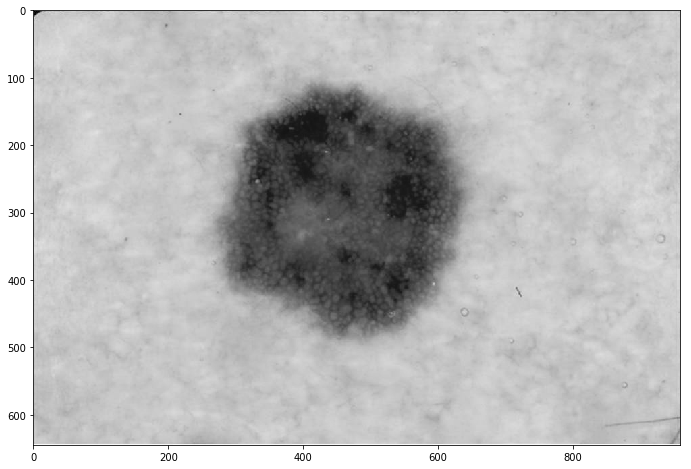

In [157]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image =  img_as_ubyte(grayscale)
edges = canny(grayscale, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(5, 5, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=2)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

## [PREPROCESS] Isolate the mole / Segment the image into mole and skin layers - failed!

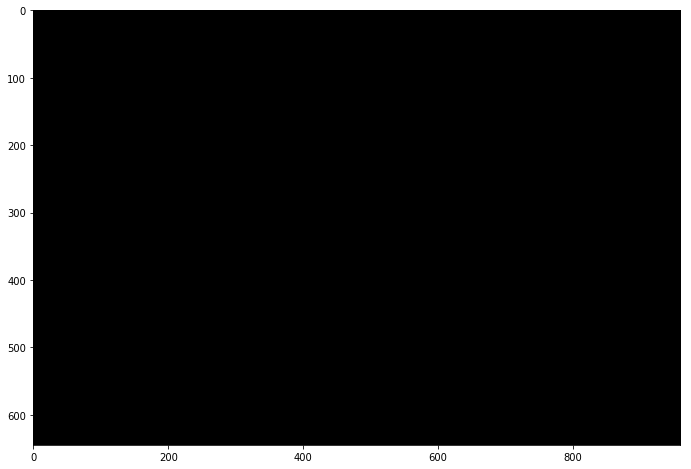

In [122]:
filepath = os.path.abspath("./data/benign/ISIC_0000232.jpg")
image = data.load(filepath)
image_gs = rgb2gray(image)

from skimage.filters import sobel
elevation_map = sobel(image_gs)

markers = np.zeros_like(image_gs)
markers[image_gs < 50] = 1
markers[image_gs > 100] = 2

from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(segmentation, cmap=plt.cm.gray)

## [PREPROCESS] Histogram Equalization

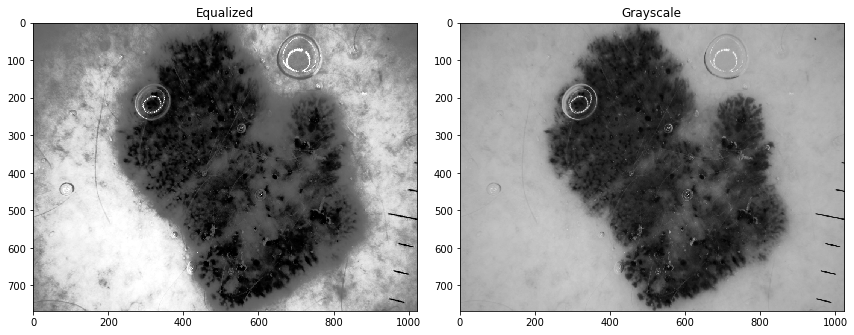

In [143]:
from skimage.exposure import equalize_hist

image_gs = grayscale
equalized_image = equalize_hist(image_gs)

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(equalized_image, cmap=plt.cm.gray)
ax[0].set_title("Equalized")
ax[1].imshow(image_gs, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

## Li Thresholding

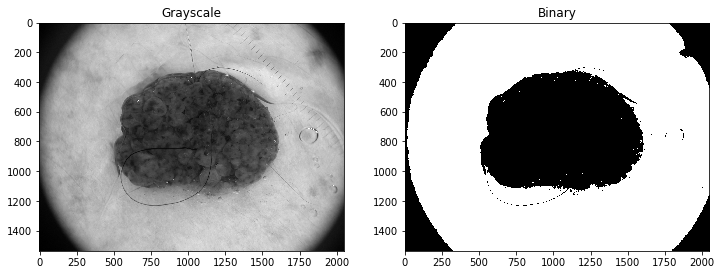

In [144]:
from skimage import filters


filepath = os.path.abspath("./data/benign/ISIC_0000104.jpg")
# filepath = os.path.abspath("./data/malignant/ISIC_0033061.jpg")

image = data.load(filepath)
image_gs = rgb2gray(image)

binary_image = np.where(image_gs > filters.threshold_li(image_gs),1.0,0.0)

show_images(images=[image_gs, binary_image],
            titles=["Grayscale","Binary"])


## Remove Circular black border

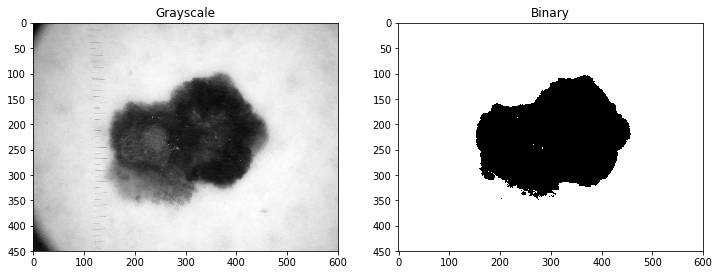

In [122]:
# filepath = os.path.abspath("./data/benign/ISIC_0033398.jpg")
filepath = os.path.abspath("./data/malignant/ISIC_0026993.jpg")

image = data.load(filepath)
image_gs = rgb2gray(image)

binary_image = np.where(image_gs > filters.threshold_li(image_gs),1.0,0.0)

# crop_v = 200
# crop_h = 50
crop_v = round(0.10 * binary_image.shape[1])
crop_h = round(0.05 * binary_image.shape[0])

binary_image[ :, :crop_v ] = True
binary_image[ :, -crop_v: ] = True

binary_image[ :crop_h, :] = True
binary_image[ -crop_h:, :] = True

show_images(images=[image_gs, binary_image],
            titles=["Grayscale","Binary"])

In [116]:
binary_image.shape

(576, 767)

In [ ]:
from skimage.draw import (line, polygon, circle,
                          circle_perimeter,
                          ellipse, ellipse_perimeter,
                          bezier_curve)

rr, cc = circle(200, 200, 100, img.shape)
img[rr, cc, :] = (1, 1, 0)

show_images(images=[image_gs, img],
            titles=["Grayscale","img"])

## [PREPROCESS] Edge detection

In [30]:
import skimage

sigma = 2.0
low_threshold = 10
high_threshold = 35

edges = skimage.feature.canny(
    image=blue[:,:,2],
    sigma=sigma,
    low_threshold=low_threshold,
    high_threshold=high_threshold,
)

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(edges, cmap=plt.cm.gray)
ax[0].set_title("Edges")
ax[1].imshow(image_gs, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

AttributeError: module 'skimage' has no attribute 'feature'

## [PREPROCESS] Image Binarization

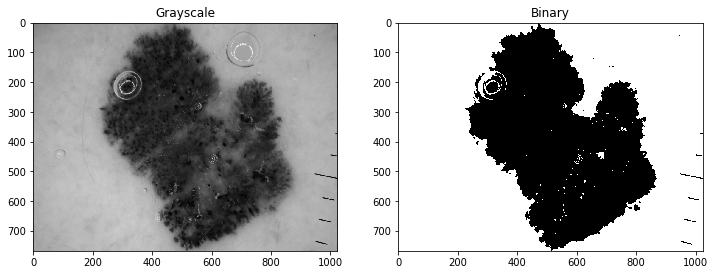

In [151]:
# filepath = os.path.abspath("./data/benign/ISIC_0000104.jpg")
# image = 
# image_gs = grayscale
# binary_image = np.where(image_gs > np.mean(image_gs),1.0,0.0)
image_gs = rgb2gray(image)
binary_image = np.where(image_gs > filters.threshold_li(image_gs),1.0,0.0)

show_images(images=[image_gs, binary_image],
            titles=["Grayscale","Binary"])

## [PREPROCESS] Find contours

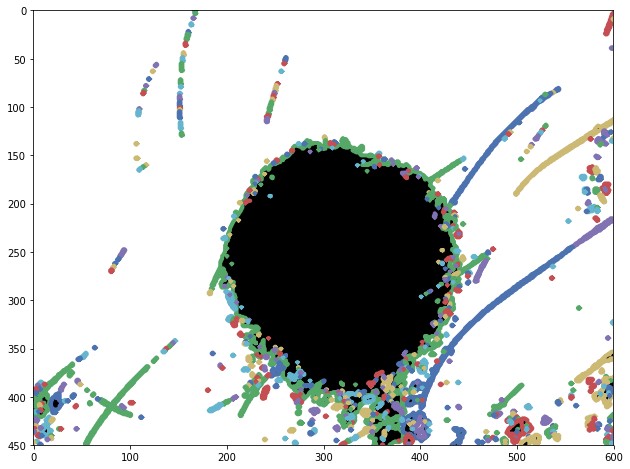

In [32]:
from skimage import measure

contours = measure.find_contours(binary_image, 0.9)

fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.imshow(binary_image, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=4)

plt.show()

## [PREPROCESS] Isolated Mole / Remove small objects

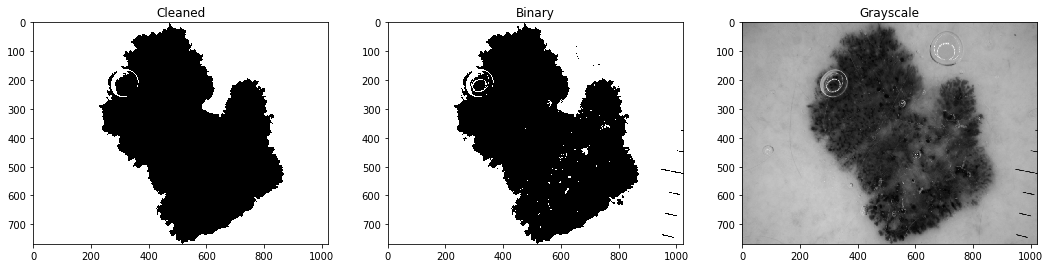

In [152]:
from skimage import io, morphology

test = binary_image > 0
cleaned = morphology.remove_small_objects(test, min_size=3000, connectivity=0.1)
cleaned = morphology.remove_small_holes(cleaned, area_threshold=500)

show_images(images=[cleaned, binary_image, image_gs],
            titles=["Cleaned","Binary", "Grayscale"])

## Skeletonize

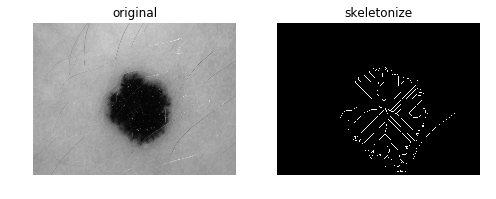

In [34]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

sk = skeletonize(cleaned == 0)
plot_comparison(grayscale, sk, 'skeletonize')

## [PREPROCESS] Find total perimeter of all objects in binary image

In [35]:
from skimage.measure import perimeter

total_perimeter = perimeter(cleaned, neighbourhood=8)
total_perimeter

total_black_pixels = np.sum(cleaned == False)
total_black_pixels

total_pixels = cleaned.shape[0] * cleaned.shape[1]
total_pixels

270000

## [FEATURE] Circularity of mole

In [36]:
# https://www.mathworks.com/matlabcentral/answers/85363-which-one-is-best-for-calculating-circularity
# circularity = (Perimeter .^ 2) ./ (4 * pi * area);
# the circularity of a circle is 1 and the higher it goes, the less circular it it. ??

circularity = (total_perimeter ** 2) / (4 * np.pi * total_black_pixels)
circularity

40.003816071848426

## [FEATURE] Asymmetry (might need to isolate mole by contour first for noisy images)

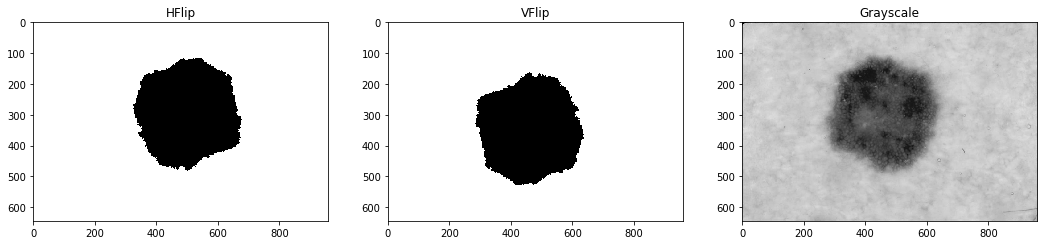

In [165]:
# one logic - flip the image horizontally, combine the mirror images, compare resultant image with the original and count how many pixels differ in intensity,
# the more pixels that differ, the more asymmetric the original image is. Maybe repeat vertically.

import numpy as np

# filepath = os.path.abspath("./data/malignant/ISIC_0010416.jpg")
filepath = os.path.abspath("./data/benign/ISIC_0000232.jpg")
# filepath = os.path.abspath("./data/malignant/ISIC_0033192.jpg")
# filepath = os.path.abspath("./data/benign/ISIC_0034267.jpg")


image = data.load(filepath)
image_gs = rgb2gray(image)

binary_image = np.where(image_gs > filters.threshold_li(image_gs),1.0,0.0)

test = binary_image > 0
cleaned = morphology.remove_small_objects(test, min_size=300, connectivity=0.1)
cleaned = morphology.remove_small_holes(cleaned, area_threshold=400)

mole_vflip = np.flip(cleaned, axis=0)
mole_hflip = np.flip(cleaned, axis=1)

show_images(images=[mole_hflip, mole_vflip, image_gs],
            titles=["HFlip","VFlip", "Grayscale"])

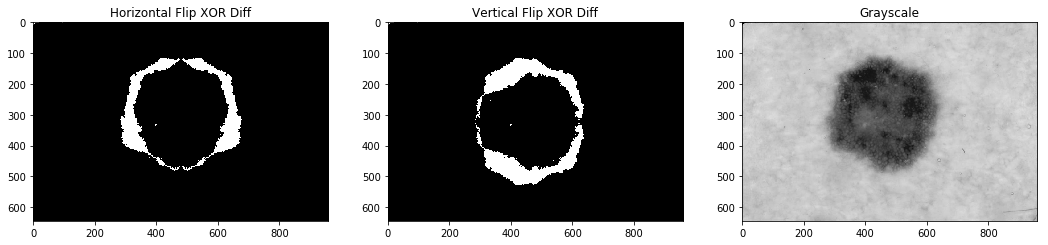

In [166]:
# get number of indices that are different from each other in original and hflip image
difference_hflip = np.logical_xor(mole_hflip, binary_image)
difference_vflip = np.logical_xor(mole_vflip, binary_image)

asymmetry_score = (np.sum(difference_hflip == True) + np.sum(difference_vflip == True)) / image_gs.flatten().shape[0]
asymmetry_score

show_images(images=[difference_hflip, difference_vflip, image_gs],
            titles=["Horizontal Flip XOR Diff","Vertical Flip XOR Diff", "Grayscale"])

In [167]:
asymmetry_score

0.1094250645994832

The current construction of the feature will fail if the mole is not at the centre of the image. Even if it is symmetrical, it will get a very high asymmetry score. The score is also sensitive to the size of the mole. How to handle?

## [PREPROCESS] Center the mole within entire image

## [PREPROCESS] Bring image to a consistent scale and magnification 

In [ ]:
# probably not possible

## [PREPROCESS] Mole-only grayscale 

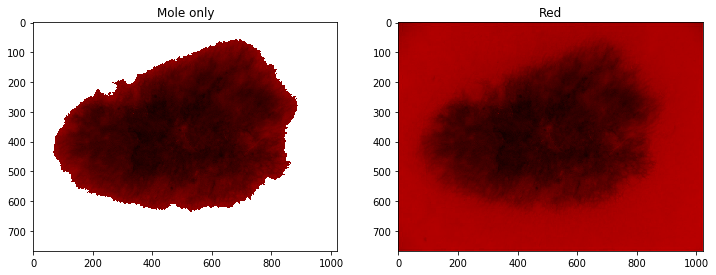

In [362]:
# filepath = os.path.abspath("./data/malignant/ISIC_0010416.jpg")
# filepath = os.path.abspath("./data/benign/ISIC_0000232.jpg")
filepath = os.path.abspath("./data/benign/ISIC_0000000.jpg")
image = data.load(filepath)
image_gs = rgb2gray(image)

red, blue, green = image.copy(), image.copy(), image.copy()
red[:,:,(1,2)] = 0
blue[:,:,(0,1)] = 0
green[:,:,(0,2)] = 0

binary_image = np.where(image_gs > np.mean(image_gs),1.0,0.0)
test = binary_image > 0
cleaned = morphology.remove_small_objects(test, min_size=3000, connectivity=0.1)
cleaned = morphology.remove_small_holes(cleaned, area_threshold=5000)

mole_isolated  = red.copy()
# mole_isolated[cleaned] = 1
mole_isolated[cleaned == 1] = 255

# mole_isolated  = blue.copy()
# # mole_isolated[cleaned] = 1
# mole_isolated[cleaned == 1] = 255


show_images(images=[mole_isolated, red],
            titles=["Mole only", "Red"])

In [363]:
mole_isolated.shape

(767, 1022, 3)

In [364]:
red_channel = mole_isolated[:,:,0]
np.median(red_channel[cleaned != 1])

74.0

## [FEATURE] Color Distribution - need to have a bounding box around mole

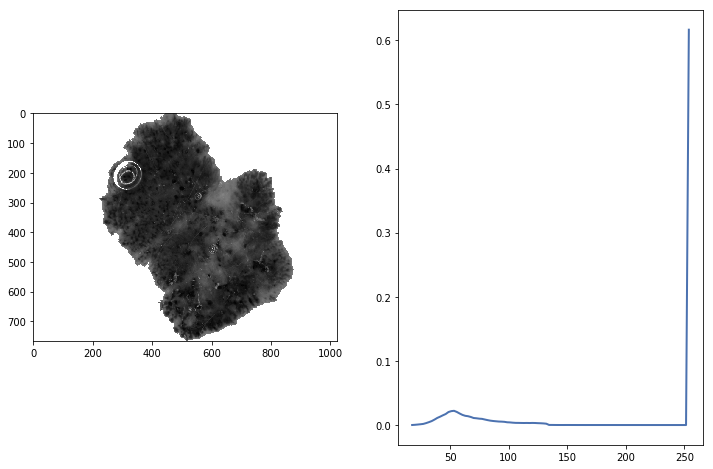

In [171]:
from skimage.exposure import histogram

filepath = os.path.abspath("./data/malignant/ISIC_0010416.jpg")
# filepath = os.path.abspath("./data/benign/ISIC_0000210.jpg")
image = data.load(filepath)
image_gs = rgb2gray(image)

binary_image = np.where(image_gs > np.mean(image_gs),1.0,0.0)
test = binary_image > 0
cleaned = morphology.remove_small_objects(test, min_size=300, connectivity=0.1)
cleaned = morphology.remove_small_holes(cleaned, area_threshold=400)

mole_isolated  = image_gs.copy()
mole_isolated[cleaned] = 1

hist, hist_centers = histogram(mole_isolated, nbins=100)
hist = hist / np.sum(hist)

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(mole_isolated, cmap=plt.cm.gray)
axes[1].plot(hist_centers * 255, hist, lw=2)

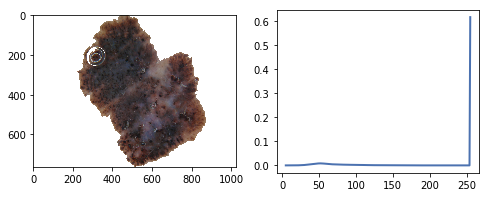

In [204]:
from skimage.exposure import histogram

# filepath = os.path.abspath("./data/malignant/ISIC_0033061.jpg")
# filepath = os.path.abspath("./data/malignant/ISIC_0032922.jpg")

# filepath = os.path.abspath("./data/benign/ISIC_0000232.jpg")
# filepath = os.path.abspath("./data/malignant/ISIC_0011329.jpg")
# filepath = os.path.abspath("./data/malignant/ISIC_0032873.jpg")
# filepath = os.path.abspath("./data/malignant/ISIC_0025835.jpg")
# filepath = os.path.abspath("./data/malignant/ISIC_0010416.jpg")
image = data.load(filepath)
image_gs = rgb2gray(image)

binary_image = np.where(image_gs > np.mean(image_gs),1.0,0.0)
test = binary_image > 0
cleaned = morphology.remove_small_objects(test, min_size=300, connectivity=0.1)
cleaned = morphology.remove_small_holes(cleaned, area_threshold=400)

mole_isolated  = image.copy()
mole_isolated[cleaned] = 255

hist, hist_centers = histogram(mole_isolated, nbins=100)
hist = hist / np.sum(hist)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].imshow(mole_isolated, cmap=plt.cm.gray)
axes[1].plot(hist_centers, hist, lw=2)

It's sufficient to look at color values below 150 in the histogram. Below 150, malignant moles have a "bumpier" histogram, benign ones have a "flat"  histogram curve. Need to capture this somehow.

In [86]:
# sum up all hist values uptil the 200 color index
colors = hist_centers * 255
index_200 = len(colors[(colors <= 200.0)])
cumulative_hist_sum = np.sum(hist[:index_200])
cumulative_hist_sum

0.4072962962962963

This is a noisy indicator, but good enough for a start.

## [FEATURE] Diameter of mole

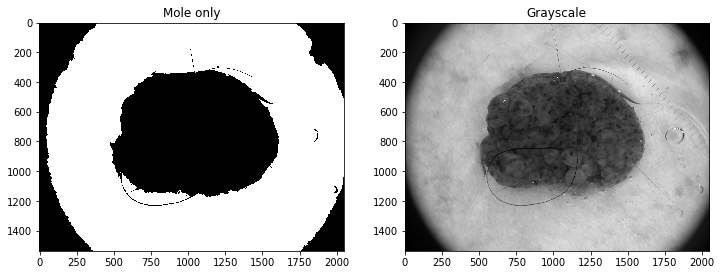

In [87]:
# filepath = os.path.abspath("./data/malignant/ISIC_0025835.jpg")
filepath = os.path.abspath("./data/benign/ISIC_0000104.jpg")
# filepath = os.path.abspath("./data/malignant/ISIC_0033061.jpg")

image = data.load(filepath)
image_gs = rgb2gray(image)

binary_image = np.where(image_gs > np.mean(image_gs),1.0,0.0)
test = binary_image > 0
cleaned = morphology.remove_small_objects(test, min_size=300, connectivity=0.1)
cleaned = morphology.remove_small_holes(cleaned, area_threshold=400)

show_images(images=[cleaned, image_gs],
            titles=["Mole only", "Grayscale"])

In [88]:
# scan image horizontally for max range of color=0 activation
hscan_1 = np.sum(binary_image, axis=0)
hscan_0 = binary_image.shape[0] - hscan_1
hscan_max = max(hscan_0)

# scan image vertically for max range of color=0 activation
vscan_1 = np.sum(binary_image, axis=1)
vscan_0 = binary_image.shape[1] - vscan_1
vscan_max = max(vscan_0)

# take the max of the two scans as the diameter of mole
diameter = max(hscan_max, vscan_max)
diameter

1536.0

Current version of diameter is sensitive to the magnification, need to scale/resize all images to a consistent size and magnification. Need to identify medial axis?

## [FEATURE] Unevenness / Irregularity of mole border

## [PREPROCESS] Remove hairs from image / inpainting

In [ ]:
# handled by cleaning process.

## Feature generator function for dataset

In [135]:
import glob
from skimage import data, io, filters
import os
import pandas as pd
from skimage import io, morphology
from skimage.color import rgb2gray
import numpy as np
from skimage.exposure import histogram
from skimage.measure import perimeter

# functions to generate features for each image

def get_asymmetry_score(image, image_gs, image_bin, image_clean):
    # one logic - flip the image horizontally, combine the mirror images, compare resultant image with the original and count how many pixels differ in intensity,
    # the more pixels that differ, the more asymmetric the original image is. Maybe repeat vertically.

    mole_vflip = np.flip(image_clean, axis=0)
    mole_hflip = np.flip(image_clean, axis=1)
    
    # get number of indices that are different from each other in original and hflip image
    difference_hflip = np.logical_xor(mole_hflip, image_bin)
    difference_vflip = np.logical_xor(mole_vflip, image_bin)

    asymmetry_score = (np.sum(difference_hflip == True) + np.sum(difference_vflip == True)) / image_gs.flatten().shape[0]
    return asymmetry_score

def get_diameter(image, image_gs, image_bin, image_clean):
    # scan image horizontally for max range of color=0 activation
    hscan_1 = np.sum(image_bin, axis=0)
    hscan_0 = image_bin.shape[0] - hscan_1
    hscan_max = max(hscan_0)

    # scan image vertically for max range of color=0 activation
    vscan_1 = np.sum(image_bin, axis=1)
    vscan_0 = image_bin.shape[1] - vscan_1
    vscan_max = max(vscan_0)

    # take the max of the two scans as the diameter of mole
#     if hscan_max >= vscan_max:
#         diameter = hscan_max / image_bin.shape[0]
#     else:
#         diameter = vscan_max / image_bin.shape[1]
    diameter = max(hscan_max, vscan_max)
    return diameter

def get_color_variation(image, image_gs, image_bin, image_clean):
    mole_isolated  = image_gs.copy()
    mole_isolated[image_clean] = 1

    hist, hist_centers = histogram(mole_isolated, nbins=100)
    hist = hist / np.sum(hist)
    
    # sum up all hist values uptil the 200 color index
    colors = hist_centers * 255
#     index_window = len(colors[(colors >= 30.0) & (colors <= 200.0)])
    index_window = len(colors[(colors <= 200.0)])
    cumulative_hist_sum = np.sum(hist[:index_window])
    cumulative_hist_sum

    return cumulative_hist_sum

def get_circularity(image, image_gs, image_bin, image_clean):
    # https://www.mathworks.com/matlabcentral/answers/85363-which-one-is-best-for-calculating-circularity
    # circularity = (Perimeter .^ 2) ./ (4 * pi * area);
    # so for me the circularity of a circle is 1 and the higher it goes, the less circular it it.    
    
    total_perimeter = perimeter(image_clean, neighbourhood=8)
    total_black_pixels = np.sum(image_clean == False)
#     total_pixels = cleaned.shape[0] * cleaned.shape[1]
#     total_pixels
    circularity = (total_perimeter ** 2) / (4 * np.pi * total_black_pixels)
    return circularity

def get_median(image, image_gs, image_bin, image_clean):
    red, blue, green = image.copy(), image.copy(), image.copy()
    red[:,:,(1,2)] = 0
    blue[:,:,(0,1)] = 0
    green[:,:,(0,2)] = 0

#     if channel == "red":
    mole_isolated  = red.copy()
    mole_isolated[image_clean == 1] = 255
    red_channel = mole_isolated[:,:,0]
    median_red = round(np.median(red_channel[image_clean != 1]), 3)

#     elif channel == "green":
    mole_isolated  = green.copy()
    mole_isolated[image_clean == 1] = 255
    green_channel = mole_isolated[:,:,1]
    median_green = round(np.median(green_channel[image_clean != 1]), 3)

#     elif channel == "blue":
    mole_isolated  = blue.copy()
    mole_isolated[image_clean == 1] = 255
    blue_channel = mole_isolated[:,:,2]
    median_blue = round(np.median(blue_channel[image_clean != 1]), 3)

#     median_color = np.median(desired_channel[image_clean != 1])
    return ((median_red, median_green, median_blue))


# create train and test sets
# folder = "benign"
folder = "malignant"
version = "v5"
img_list = glob.glob("data/" + folder + "/*.jpg", recursive=False)

csv_rows = [ ]
for img in img_list:

    # open image
    filepath = os.path.abspath(img)
    print(filepath)
    image = data.load(filepath)
    image_gs = rgb2gray(image)
    
    # add common preprocessing steps for all features here
    image_bin = np.where(image_gs > filters.threshold_li(image_gs),1.0,0.0)

    # crop_v = 200
    # crop_h = 50
    crop_v = round(0.10 * image_bin.shape[1])
    crop_h = round(0.05 * image_bin.shape[0])

    image_bin[ :, :crop_v ] = True
    image_bin[ :, -crop_v: ] = True

    image_bin[ :crop_h, :] = True
    image_bin[ -crop_h:, :] = True

    test = image_bin > 0
#     image_clean = morphology.remove_small_objects(test, min_size=3000, connectivity=0.001)
#     image_clean = morphology.remove_small_holes(image_clean, area_threshold=400)
    image_clean = morphology.remove_small_objects(test, min_size=6000, connectivity=0.1)
    image_clean = morphology.remove_small_holes(image_clean, area_threshold=5000)

    # downsample, resize, scale, crop, color normalization, binarize, whatever

    csv_row = { }
    csv_row["file_name"] = img.split("\\")[-1]
    csv_row["asymmetry_score"] = round(get_asymmetry_score(image, image_gs, image_bin, image_clean), 3)
    csv_row["diameter"] = round(get_diameter(image, image_gs, image_bin, image_clean), 3)
    csv_row["color_variation"] = round(get_color_variation(image, image_gs, image_bin, image_clean), 3)
    csv_row["circularity"] =  round(get_circularity(image, image_gs, image_bin, image_clean), 3)
    csv_row["median_red"], csv_row["median_green"], csv_row["median_blue"] = get_median(image, image_gs, image_bin, image_clean) 
#     csv_row["median_red"] = round(get_median(image, image_gs, image_bin, image_clean, "red"), 3)
#     csv_row["median_green"] = round(get_median(image, image_gs, image_bin, image_clean, "green"), 3)
#     csv_row["median_blue"] = round(get_median(image, image_gs, image_bin, image_clean, "blue"), 3)

    #     csv_row["border_roughness"] = get_border_roughness(image)
    csv_rows.append(csv_row)

    
df = pd.DataFrame(csv_rows, columns = ["file_name", "asymmetry_score", "diameter", 
                                       "color_variation", "circularity",
                                      "median_red", "median_green", "median_blue"])
df.to_csv(folder + "_" + version + ".csv", index=False)

print(folder + "_" + version + ".csv generated!")

C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000022.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000148.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000150.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000158.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000161.jpg


C:\Users\neera\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in double_scalars


C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000162.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000166.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000174.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000395.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000399.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000487.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0000549.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0001101.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0001102.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0009898.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0010094.jpg

C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0026993.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0027105.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0027144.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0027171.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0027263.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0027277.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0027327.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0027328.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0027350.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0032873.jpg
C:\Users\neera\OneDrive\Documents\STAT542\STAT542_Project2\data\malignant\ISIC_0032922.jpg

## Check histogram of features against label to see how noisy they are

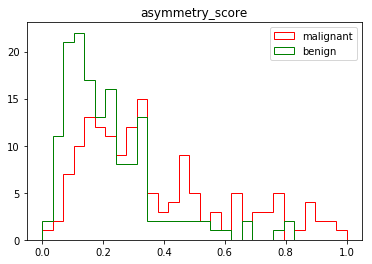

In [213]:
df_benign = pd.read_csv("benign_test.csv")
df_malignant = pd.read_csv("malignant_test.csv")

check_feature = "asymmetry_score"
# check_feature = "diameter"
# check_feature = "color_variation"
# check_feature = "circularity"
# check_feature = "median_red"
# check_feature = "median_blue"
# check_feature = "median_green"

bins = np.linspace(0, 1, 30)

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

plt.hist([df_benign[check_feature], df_malignant[check_feature]], bins, 
         label=['benign', 'malignant'], histtype="step", color=["green", "red"])
plt.legend(loc='upper right')
plt.title(check_feature)
plt.show()

## Boxplot summary of feature